In [31]:
import pandas as pd
import re
import importlib
import tld

import nb_trending


import matplotlib.pyplot as plt

from matplotlib import lines

In [17]:
importlib.reload(nb_trending)

<module 'nb_trending' from '/n/fs/policyphylog/PrivacyPolicyPlagiarism/notebooks/nb_trending.py'>

In [15]:
try:
    cache = nb_trending.cache
except:
    pass
importlib.reload(nb_trending)
if cache:
    nb_trending.cache = cache

In [4]:
df = df_1k = df_sample = None

In [5]:
#Load the data
import pickle
with open("../data/deduped_policy_text_v11no_html_with_links_and_emails.pickle", "rb") as f:
    df = pickle.load(f)
    df_sample = df.sample(1000)

In [6]:
def get_x(mydf,month_and_year):
    month, year = month_and_year
    
    first_ys_value = min(list(mydf.year_season.unique()))
    start_year = int(first_ys_value[:4])
    start_interval = first_ys_value[5]
    if start_interval == "A":
        start_month = 3
    else:
        start_month = 9
        
    x = (year - start_year) * 2 + (month - start_month) * (1/6)
    
    return x

def add_point_at(mydf,month_and_year,y,label,**kwargs):
    
    x = get_x(mydf,month_and_year)
    plt.plot(x,y,'ko')
    plt.text(x,y,label,verticalalignment="center",**kwargs)
    
def add_line_at(mydf,month_and_year,label,**kwargs):
    x = get_x(mydf,month_and_year)
    plt.axvline(x,color="black",linestyle="--")
    transform = plt.axes().get_xaxis_transform()
    plt.text(x,1,label,transform=transform,**kwargs)

In [7]:
site_urls = """http://taobao.com
http://tmall.com
http://dropbox.com
http://bbc.com
http://cnzz.com
http://detail.tmall.com
http://avito.ru
http://washingtonpost.com
http://groupon.com
http://ndtv.com
http://seznam.cz
http://elpais.com
http://conservativetribune.com
http://bleacherreport.com
http://vid.me
http://marca.com
http://nbcnews.com
http://cbssports.com
http://elmundo.es
http://time.com
http://lazada.co.id
http://expedia.com
http://theverge.com
http://fandango.com
http://hotels.com
http://list.tmall.com
http://cbsnews.com
http://pof.com
http://eonline.com
http://constantcontact.com
http://howtogeek.com
http://nexusmods.com
http://youjizz.com
http://aa.com
http://weblio.jp
http://whitepages.com
http://cnbc.com
http://gutefrage.net
http://reverso.net
http://nypost.com
http://popsugar.com
http://popsugar.com
http://primewire.ag
http://kotaku.com
http://nhl.com
http://novinky.cz
http://inquirer.net
http://breitbart.com
http://buy.tmall.com
http://westernjournalism.com
http://westernjournalism.com
http://viralthread.com
http://nbcsports.com
http://114la.com
http://etao.com
http://discogs.com
http://boredpanda.com
http://today.com
http://xiami.com
http://ctrip.com
http://filmibeat.com
http://usmagazine.com
http://ecnavi.jp
http://theblaze.com
http://spankbang.com
http://pogo.com
http://ibnlive.com
http://patheos.com
http://metrolyrics.com
http://mail.com
http://websta.me
http://complex.com
http://wowhead.com
http://wowhead.com
http://pikabu.ru
http://super.cz
http://salon.com
http://olx.ro
http://hollywoodreporter.com
http://metacritic.com
http://kbb.com
http://brainyquote.com
http://phonearena.com
http://mvideo.ru
http://autotrader.com
http://terra.com.br
http://ddanzi.com
http://televisionfanatic.com
http://nbc.com
http://mileroticos.com
http://wyborcza.pl
http://daily.co.jp
http://nitroflare.com
http://jalopnik.com
http://yourdailydish.com
http://cars.com
http://daikynguyenvn.com
http://nymag.com
http://ouedkniss.com
http://economist.com""".split("\n")
fingerprinter_df = df[df.site_url.isin(site_urls)]

for su, subdf in fingerprinter_df[fingerprinter_df.policy_text.str.contains(r"(canvas|fingerprint)",regex=True,case=False)].groupby("site_url"):
    print(su)
    text_re = re.compile(r"(canvas|fingerprint)",flags=re.IGNORECASE)
    
    row = subdf.sort_values("year_season").iloc[-1]
    
    print(f"{row.site_url} {row.year_season}\n{row.policy_text}")
    print("="*40)


/n/fs/policyphylog/PrivacyPolicyPlagiarism/.venv/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


http://fandango.com
http://fandango.com 2019_B
en Español  |  en Français  |  auf Deutsch 

Last updated: December 10, 2019

This Privacy Policy explains how Fandango Media, LLC and its subsidiary companies, including the businesses operating under the Fandango, FandangoNOW, Rotten Tomatoes, Flixster, Movieclips, Movies.com, Activaterewards.com, MovieTickets.com, or M-GO brands ("Fandango", "we", "our" or "us"), collect, use, and share information from or about you when you use our websites, downloadable applications, interactive TV applications, voice-activated skills, other digital services, connected devices, and off-line services that link to this policy, or if you generate ratings/reviews/public comments/content on our properties or engage in business with us (the “Services”). Note that this Privacy Policy does not apply to our movie ticketing business that operates in Latin America, as that business has a separate privacy policy. 

Our Owners

When the Services receive or collect

In [8]:
def extract_flds(links):
    flds = []
    for link in links:
        try:
            flds.append(tld.get_fld(link, fix_protocol=True))
        except tld.exceptions.TldBadUrl as e:
            pass
    return ','.join(flds)

df['links_str'] = df.links.map(extract_flds)

#df['links_str'] = df.links.map(lambda x: ','.join(x))

#df_sample_link = df_sample[df_sample.links.map(lambda x: len(x) > 0)]
#pd.DataFrame({"link_names":df_sample_link.links.map(extract_flds),"links":df_sample_link.links})

In [9]:
df_1k_at_time = df[df.alexa_rank <= 1000]
top1kdoms = set(df_1k_at_time.site_url)
df_1k = df[df.site_url.isin(top1kdoms)]


# Final Graphs

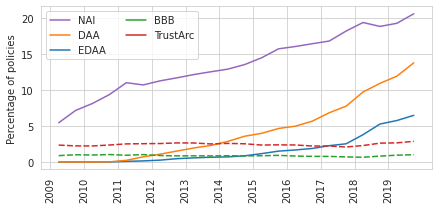

In [61]:
terms = [
    (r"(?:\bBBBOnLine\b|Better\sBusiness\sBureau)",r"\bbbb.org\b"),
    (r"(?:\bTRUSTe\b|\bTrustArc\b)",r"\btrust(?:e|arc)\.(?:com|org)\b"),
    (r"(?:\bDAA\b|(?<=European\sInteractive\s)Digital\sAdvertising\sAlliance(?=\sof\sCanada)|\bAdChoices\b)",r"\b(?:aboutads\.(?:info)|digitaladvertisingalliance.org|youradchoices\.com)"),
    (r"(?:\bNAI\b|Network\sAdvertising\sInitiative)",r"\bnetworkadvertising\.org\b"),
    (r"(?:\bEDAA\b|European\sInteractive\Digital\sAdvertising\sAlliance)",r"\b(?:edaa\.eu|youronlinechoices\.(?:eu|com))\b"),
]
labels = [
    "BBB",
    "TrustArc",
    "DAA",
    "NAI",
    "EDAA"
]



s0 = "Privacy seals"
s1 = "Trade groups"
fig, save, results = nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure="selfreg.pdf",markers=False,style=[s0,s0,s1,s1,s1],final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(0,1),"loc":"upper left","ncol":2}
                      )

legend_hls = list(zip(*fig.get_legend_handles_labels()))
legend1_hls = list(map(legend_hls.__getitem__,[5,2,1,3,4]))
handles,figlabels = zip(*legend1_hls)
plt.legend(handles=handles, labels=figlabels,ncol=2)
# legend1_hls = list(map(legend_hls.__getitem__,[-2,5,2,1,-1,3,4]))
# #legend1_hls = legend_hls
# handles,figlabels = zip(*legend1_hls)
# handles = list(handles)
# handles[0] = lines.Line2D([],[],color="white")
# handles[-3] = lines.Line2D([],[],color="white")

# handles[-1].set_linestyle("--")
# handles[-2].set_linestyle("--")



# add_line_at(df[df.year >= 2009],(11,2014),"TRUSTe FTC settlement",rotation=5)
save()
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True)

['Yahoo/AOL', 'Facebook', 'Twitter', 'Google', 'Amazon', 'Automattic', 'Cloudflare', 'AppNexus']


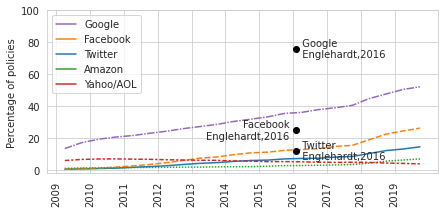

In [63]:
import tracker_to_regexes as ttr

ttr_tls = list(zip(ttr.terms,ttr.labels))
print(ttr.labels)
ttr_tls = [ttr_tls[i] for i in [0,1,2,3,4]]
ttr_terms,ttr_labels = zip(*ttr_tls)

fig,save, results = nb_trending.plot_terms(df,ttr_terms,labels=ttr_labels,regex=True,case=False,save_figure="trackers.pdf",markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(0,1),"loc":"upper left","ncol":1}
                      )
plt.ylim(top=100)

legend_hls = list(zip(*fig.get_legend_handles_labels()))
legend1_hls = list(map(legend_hls.__getitem__,[5,2,1,3,4]))
handles,figlabels = zip(*legend1_hls)
plt.legend(handles=handles, labels=figlabels,**{"bbox_to_anchor":(0,1),"loc":"upper left","ncol":1})

#FIXME check numbers
add_point_at(df[df.year >= 2009],(1,2016),75.9,"  Google\n  Englehardt,2016")
add_point_at(df[df.year >= 2009],(1,2016),24.8,"Facebook  \nEnglehardt,2016  ",ha="right")
add_point_at(df[df.year >= 2009],(1,2016),11.9,"  Twitter\n  Englehardt,2016")

save()

   interval  percentage search_term       style
0    2009_A   20.866198  Web Beacon  Web Beacon
1    2009_B   23.298844  Web Beacon  Web Beacon
2    2010_A   24.501553  Web Beacon  Web Beacon
3    2010_B   26.065036  Web Beacon  Web Beacon
4    2011_A   27.635039  Web Beacon  Web Beacon
5    2011_B   27.694021  Web Beacon  Web Beacon
6    2012_A   28.235420  Web Beacon  Web Beacon
7    2012_B   28.673684  Web Beacon  Web Beacon
8    2013_A   29.804497  Web Beacon  Web Beacon
9    2013_B   30.459384  Web Beacon  Web Beacon
10   2014_A   31.272048  Web Beacon  Web Beacon
11   2014_B   31.743272  Web Beacon  Web Beacon
12   2015_A   32.153552  Web Beacon  Web Beacon
13   2015_B   33.199172  Web Beacon  Web Beacon
14   2016_A   33.341282  Web Beacon  Web Beacon
15   2016_B   34.057470  Web Beacon  Web Beacon
16   2017_A   35.299476  Web Beacon  Web Beacon
17   2017_B   35.959354  Web Beacon  Web Beacon
18   2018_A   37.773571  Web Beacon  Web Beacon
19   2018_B   39.371301  Web Beacon  Web

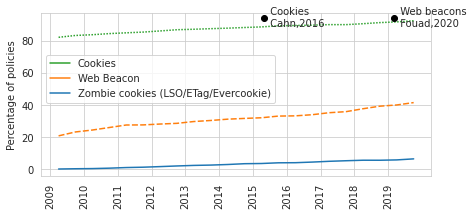

In [64]:
terms = [
    r"\bcookie",
    r"\b(?:web\s(?:bug|beacon)|tracking\sbug|pixels?|tags?\b|(?:1.?1|clear).?gif)",
    r"\b(?:(?:ever|zombie|super|flash).?cookie|LSO\b|local.shared.object|etags?\b)",
    #r"(?:flash\scookie|\blso\b|local\sshared\sobject)",
    #r"tracking\stechnolog(?:y|ies)",
    #r"third[\-\s]part(?:y|ies)",
    #r"javascript",
    #r"cross[\s\-]device",
]
labels = [
    "Cookies",
    "Web Beacon",
    "Zombie cookies (LSO/ETag/Evercookie)",
    #"Flash Cookie/LSO",
    #"Tracking technology",
    #"Third Party",
    #"JavaScript",
    #"Cross-Device",
]

fig, save, results = nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure="technologies.pdf",markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(0,0.6),"loc":"center left","ncol":1}
                      )

legend_hls = list(zip(*fig.get_legend_handles_labels()))
legend1_hls = list(map(legend_hls.__getitem__,[3,2,1]))
handles,figlabels = zip(*legend1_hls)
plt.legend(handles=handles, labels=figlabels,**{"bbox_to_anchor":(0,0.6),"loc":"center left","ncol":1})



add_point_at(df[df.year >= 2009],(4,2015),94.6,"  Cookies\n  Cahn,2016")
add_point_at(df[df.year >= 2009],(2,2019),94.5,"  Web beacons\n  Fouad,2020")

save()

print(results[results.search_term == "Web Beacon"])
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,bottom_left=True)

   interval  percentage   search_term         style
0    2009_A    0.018892  Tracking Bug  Tracking Bug
1    2009_B    0.018259  Tracking Bug  Tracking Bug
2    2010_A    0.016343  Tracking Bug  Tracking Bug
3    2010_B    0.011725  Tracking Bug  Tracking Bug
4    2011_A    0.015025  Tracking Bug  Tracking Bug
5    2011_B    0.014277  Tracking Bug  Tracking Bug
6    2012_A    0.018710  Tracking Bug  Tracking Bug
7    2012_B    0.015789  Tracking Bug  Tracking Bug
8    2013_A    0.017107  Tracking Bug  Tracking Bug
9    2013_B    0.009590  Tracking Bug  Tracking Bug
10   2014_A    0.016353  Tracking Bug  Tracking Bug
11   2014_B    0.016671  Tracking Bug  Tracking Bug
12   2015_A    0.028211  Tracking Bug  Tracking Bug
13   2015_B    0.027599  Tracking Bug  Tracking Bug
14   2016_A    0.032515  Tracking Bug  Tracking Bug
15   2016_B    0.028616  Tracking Bug  Tracking Bug
16   2017_A    0.036927  Tracking Bug  Tracking Bug
17   2017_B    0.038852  Tracking Bug  Tracking Bug
18   2018_A 

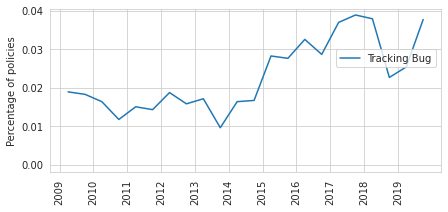

In [65]:
terms = [
    r"\btracking\sbugs?\b",
]
labels = [
    "Tracking Bug",
]

fig, save, results = nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=False,markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(1,0.7),"loc":"center right","ncol":2}
                      )


save()

print(results)
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,bottom_left=True)

   interval  percentage search_term       style
0    2009_A   34.785354  Web Beacon  Web Beacon
1    2009_B   35.065943  Web Beacon  Web Beacon
2    2010_A   37.759563  Web Beacon  Web Beacon
3    2010_B   38.116846  Web Beacon  Web Beacon
4    2011_A   39.416446  Web Beacon  Web Beacon
5    2011_B   39.634703  Web Beacon  Web Beacon
6    2012_A   40.694006  Web Beacon  Web Beacon
7    2012_B   41.700960  Web Beacon  Web Beacon
8    2013_A   44.487847  Web Beacon  Web Beacon
9    2013_B   44.289340  Web Beacon  Web Beacon
10   2014_A   46.633416  Web Beacon  Web Beacon
11   2014_B   47.479535  Web Beacon  Web Beacon
12   2015_A   49.554656  Web Beacon  Web Beacon
13   2015_B   50.373955  Web Beacon  Web Beacon
14   2016_A   52.209945  Web Beacon  Web Beacon
15   2016_B   50.540275  Web Beacon  Web Beacon
16   2017_A   50.723914  Web Beacon  Web Beacon
17   2017_B   52.634498  Web Beacon  Web Beacon
18   2018_A   54.369538  Web Beacon  Web Beacon
19   2018_B   54.228267  Web Beacon  Web

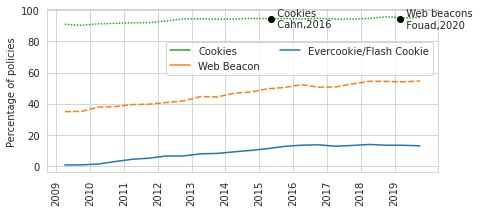

In [67]:
terms = [
    r"\bcookie",
    r"\b(?:web\s(?:bug|beacon)|tracking\sbug|pixels?|tags?\b|(?:1.?1|clear).?gif)",
    r"\b(?:evercookie|flash.?cookie|LSO\b|local.shared.object|etags?\b)",
    #r"(?:flash\scookie|\blso\b|local\sshared\sobject)",
    #r"tracking\stechnolog(?:y|ies)",
    #r"third[\-\s]part(?:y|ies)",
    #r"javascript",
    #r"cross[\s\-]device",
]
labels = [
    "Cookies",
    "Web Beacon",
    "Evercookie/Flash Cookie",
    #"Flash Cookie/LSO",
    #"Tracking technology",
    #"Third Party",
    #"JavaScript",
    #"Cross-Device",
]

fig, save, results = nb_trending.plot_terms(df[df.alexa_rank <= 10000],terms,dfId="10k",labels=labels,regex=True,case=False,save_figure="technologies_10k.pdf",markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(1,0.7),"loc":"center right","ncol":2}
                      )

legend_hls = list(zip(*fig.get_legend_handles_labels()))
legend1_hls = list(map(legend_hls.__getitem__,[3,2,1]))
handles,figlabels = zip(*legend1_hls)
plt.legend(handles=handles, labels=figlabels,**{"bbox_to_anchor":(1,0.7),"loc":"center right","ncol":2})

add_point_at(df[df.year >= 2009],(4,2015),94.6,"  Cookies\n  Cahn,2016")
add_point_at(df[df.year >= 2009],(2,2019),94.5,"  Web beacons\n  Fouad,2020")

save()

print(results[results.search_term == "Web Beacon"])
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,bottom_left=True)

/n/fs/policyphylog/PrivacyPolicyPlagiarism/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/n/fs/policyphylog/PrivacyPolicyPlagiarism/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/n/fs/policyphylog/PrivacyPolicyPlagiarism/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Addin

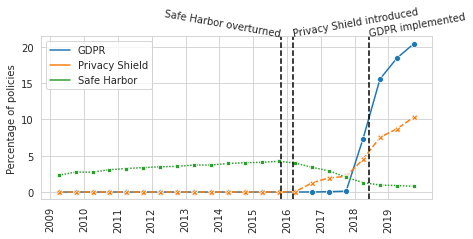

In [70]:
terms = [
    r"(?:\bGDPR\b|General Data Protection Regulation)",
#     (r"(?:\bCCPA\b|California\sConsumer\sPrivacy\sAct)",r"https://oag\.ca\.gov/privacy/ccpa"),
#     r"(?:\bCOPPA\b|Children.?s\sOnline\sPrivacy\sProtection\sAct)",
#     r"(?:\bCalOPPA\b|California Online Privacy Protection Act)",
#     r"\b(?:BCR|Binding\sCorporate\sRules)\b",
#     r"\b(?:Standard\sContract(?:ual)?\sClauses|SCC)\b",
    (r"Privacy\sShield",r"privacyshield\.gov"),
    (r"Safe\sHarbou?r",r"export\.gov/safeharbor/"),
    #r"(?:regulation)",
    #r"(?:self[\s\-]?regulation)",
    #r"\b(?:Data\sPrivacy\sDirective)\b",
    #r"\b(?:e[\-\s]?Privacy)\b",
    #r"\b(?:e[\-\s]?Privacy\sDirective)\b",
]
labels = [
    "GDPR",
#     "CCPA",
#     "COPPA",
#     "CalOPPA",
#     "BCR",
#     "SCC",
    "Privacy Shield",
    "Safe Harbor",
    #"Regulation",
    #"Self-regulation",
    #"ePrivacy",
    #"ePrivacy Directive"
]
fig, save, results = nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure="regulations_agreements.pdf",markers=True,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(0,1),"loc":"upper left","ncol":3}
                      )

legend_hls = list(zip(*fig.get_legend_handles_labels()))
legend1_hls = list(map(legend_hls.__getitem__,[1,2,3]))
handles,figlabels = zip(*legend1_hls)
plt.legend(handles=handles, labels=figlabels,**{"bbox_to_anchor":(0,1),"loc":"upper left","ncol":1})

add_line_at(df[df.year >= 2009],(10,2015),"Safe Harbor overturned",rotation=-10,horizontalalignment="right")
add_line_at(df[df.year >= 2009],(2,2016),"Privacy Shield introduced",rotation=10)
add_line_at(df[df.year >= 2009],(5,2018),"GDPR implemented",rotation=10)

save()

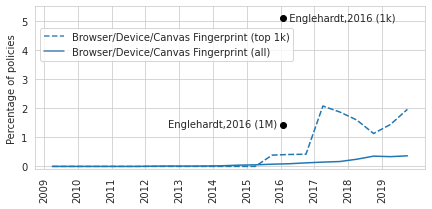

In [72]:
terms = [
    #r"finger.?print",
    r"(?:browser|device|canvas|machine)\sfinger.?print",
]
labels = [
    #"Fingerprint",
    "Browser/Device/Canvas Fingerprint",
]


fig, save = nb_trending.plot_terms_many_sources([df,df_1k_at_time],terms,labels=labels,df_labels=["all","1k"],regex=True,case=False,save_figure="fingerprinting.pdf",final=True)

plt.ylim(top=5.5)

add_point_at(df[df.year >= 2009],(1,2016),1.437,"Englehardt,2016 (1M)  ",ha="right")
add_point_at(df[df.year >= 2009],(1,2016),5.10,"  Englehardt,2016 (1k)")


figlabels = [
    #"Fingerprint (1k)",
    "Browser/Device/Canvas Fingerprint (top 1k)",
    #"Fingerprint (all)",
    "Browser/Device/Canvas Fingerprint (all)",
]
handles = [
    #lines.Line2D([],[],color="coral",linestyle='--'),
    lines.Line2D([],[],color="steelblue",linestyle='--'),
    #lines.Line2D([],[],color="coral"),
    lines.Line2D([],[],color="steelblue")
]



plt.legend(handles=handles, labels=figlabels,loc=2,bbox_to_anchor=(0,0.9))


save()

## TLS/SSL

In [ ]:
try:
    cache = nb_trending.cache
except:
    pass
import importlib
importlib.reload(nb_trending)
if cache:
    nb_trending.cache = cache
    
    
terms = [
    r"SSL",
    r"TLS",
    r"(?:TLS|SSL)",
]
labels = [
    "SSL",
    "TLS",
    "SSL/TLS",
]
nb_trending.plot_terms(df_sample,terms,labels=labels,regex=True,case=True,save_figure=False)

# Privacy Seals

In [ ]:
terms = [
    (r"(?:\bBBBOnLine\b|\bBetter\sBusiness\sBureau\b)",r"\bbbb.org\b"),
    (r"(?:\bTRUSTe\b|\bTrustArc\b)",r"(?:\btruste.com\b|\btrustarc.com\b)"),
    (r"(?:\bEuroPriSe\b|\bEuropean\sPrivacy\Seal\b)",r"\beuropean-privacy-seal.eu\b"),
    (r"\bVeraSafe\b",r"\bverasafe.com\b"),
    (r"(?:\bDAA\b|\bDigital\sAdvertising\sAlliance\b|\bAdChoices\b)",r"(?:\byouradchoices.com\b|\bdigitaladvertisingalliance.org\b)"),
    (r"(?:\bNAI\b|\bNetwork\sAdvertising\sInitiative\b)",r"\bnetworkadvertising.org\b"),
    (r"\bDoubleVerify\b",r"\bdoubleverify.com\b"),
    (r"\bEvidon\b",r"\bevidon.com\b"),
    r"\b(?:CNIL)\b"
]
labels = [
    "BBBOnLine",
    "TrustArc",
    "EuroPriSe",
    "VeraSafe",
    "DAA",
    "NAI",
    "DoubleVerify",
    "Evidon",
    "CNIL",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=True,save_figure=True,markers=True)

In [ ]:
terms = [
    (r"(?:\bBBBOnLine\b|\bBetter\sBusiness\sBureau\b)",r"\bbbb.org\b"),
    (r"(?:\bTRUSTe\b|\bTrustArc\b)",r"(?:\btruste.com\b|\btrustarc.com\b)"),
    (r"(?:\bEuroPriSe\b|\bEuropean\sPrivacy\Seal\b)",r"\beuropean-privacy-seal.eu\b"),
    (r"\bVeraSafe\b",r"\bverasafe.com\b"),
    (r"(?:\bDAA\b|\bDigital\sAdvertising\sAlliance\b)",r"\bdigitaladvertisingalliance.org\b"),
    (r"(?:\bNAI\b|\bNetwork\sAdvertising\sInitiative\b)",r"\bnetworkadvertising.org\b"),
    (r"\bDoubleVerify\b",r"\bdoubleverify.com\b"),
    (r"\bEvidon\b",r"\bevidon.com\b"),
    (r"\b(?:CNIL|Commission nationale)\b",r"\bcnil\.fr\b"),
    r"\bbuySAFE\b",
    r"\bCloud Security Alliance\b",
    r"\bComodo Secure\b",
    r"\bConfianza\b",
    r"\be\-mark\b",
    (r"\b(?:ESRB|Entertainment\sSoftware)\b",r"\besrb.org\b"),
    r"\bEuro\-Label\b",
    r"\bGigya\b",
    r"\b(?:Market Research Society|MRS)\b",
    r"\bMcAfee Secure\b",
    r"\bPrivacyMark\b",
    r"\bPrivo\b",
    r"\bSeriedad\b",
    r"\bSmart Grid\b",
    r"\bTransaction Guard\b",
    r"\bTrusted Shops\b",
    r"\bTrustify\-Me\b",
    r"\bT[ÜuUü]V\b",
    r"\bVISA\b",
    
]
labels = [
    "BBBOnLine",
    "TrustArc",
    "EuroPriSe",
    "VeraSafe",
    "DAA",
    "NAI",
    "DoubleVerify",
    "Evidon",
    "CNIL",
    r"buySAFE",
    r"Cloud Security Alliance",
    r"Comodo Secure",
    r"Confianza",
    r"e-mark",
    r"ESRB",
    r"Euro-Label",
    r"Gigya",
    r"Market Research Society",
    r"McAfee Secure",
    r"PrivacyMark",
    r"Privo",
    r"Seriedad",
    r"Smart Grid",
    r"Transaction Guard",
    r"Trusted Shops",
    r"Trustify-Me",
    r"TUV",
    r"VISA",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=True,save_figure=True,markers=True)

In [ ]:
terms = [
    (r"\b(?:BBBOnLine|\bBetter\sBusiness\sBureau)",r"\bbbb\.org\b"),
    (r"\btrust(?:arc|e\b)",r"\btrust(?:arc|e)\.(?:org|com)\b"),
    (r"\b(?:EuroPriSe|European\sPrivacy\Seal)\b",r"\beuropean-privacy-seal\.eu"),
    (r"\bVeraSafe\b",r"verasafe.com"),
    (r"\b(?:DAA|Digital\sAdvertising\sAlliance)",r"\b(?:aboutads\.(?:com|org)|digitaladvertisingalliance.org)"),
    (r"\b(?:NAI|Network\sAdvertising\sInitiative)\b",r"\bnetworkadvertising.org"),
    (r"\b(?:\bEDAA\b|European\sInteractive\Digital\sAdvertising\sAlliance)",r"\bedaa\.eu\b"),
    (r"\bDoubleVerify\b",r"\bdoubleverify.com"),
    (r"\bEvidon\b",r"\bevidon.com"),
]
labels = [
    "BBBOnLine",
    "TrustArc",
    "EuroPriSe",
    "VeraSafe",
    "DAA",
    "NAI",
    "EDAA",
    "DoubleVerify",
    "Evidon"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:
terms = [
    r"\b(?:BBBOnLine|\bBetter\sBusiness\sBureau|\bbbb.org)\b",
    r"\b(?:TRUSTe|TrustArc\b|\btruste.com|\btrustarc.com)\b",
    #r"\b(?:EuroPriSe|European\sPrivacy\Seal|european-privacy-seal.eu)\b",
    #r"\b(?:VeraSafe|verasafe.com)\b",
    #r"\b(?:DoubleVerify|doubleverify.com)\b",
    r"\b(?:Evidon|evidon.com)\b",
    r"\b(?:PCI|Payment Card Industry|pcisecuritystandards.org)\b",
    r"\b(?:Verisign|\bverisign.com)\b",
    r"\b(?:Norton|\bnorton.com)\b",
    r"WebTrust",
]
labels = [
    "BBBOnLine",
    "TrustArc",
    #"EuroPriSe",
    #"VeraSafe",
    #"DoubleVerify",
    "Evidon",
    "PCI",
    "Verisign",
    "Norton",
    "WebTrust",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

# Tracking terminology

In [ ]:
terms = [
    r"\bcookies?\b",
    r"\bweb\s(?:bug|beacon)\b",
    r"\bevercookies?\b",
    r"\bflash\b",
    r"\b(?:flash\scookie|lso|local\sshared\sobject)\b",
    r"\bcross[\s\-]device",
    r"\b(?:browser|device)\sfingerprint",
    r"\bcanvas\sfingerprint",
    r"(?<!anti[\-\s])\btracking\stechnolog(?:y|ies)\b",
    r"\banti[\s\-]?tracking\stechnolog(?:y|ies)\b",
    r"\bthird[\-\s]part(?:y|ies)\b",
    r"\bjavascript\b",
]
labels = [
    "Cookies",
    "Web Beacon/Bug",
    "Evercookie",
    "Flash",
    "Flash Cookie/LSO",
    "Cross-Device",
    "Browser/Device Fingerprint",
    "Canvas Fingerprint",
    "Tracking technology",
    "Anti-tracking technology",
    "Third Party",
    "JavaScript",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:
term = r"canvas.?fingerprint"

label = "fingerprint_1k_at_time"

nb_trending.search_for_context(df,term,label=label,regex=True,case=False)

In [ ]:
terms = [
    r"canvas fingerprint"
]
labels = [
    "fingerprint_1k_at_time"
]

nb_trending.plot_terms(df_1k_at_time,terms,labels=labels,regex=True,case=False,markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(1,0.6),"loc":"center right","ncol":2}
                      )
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,bottom_left=True)

In [ ]:
terms = [
    r"fingerprint"
]
labels = [
    "Fingerprint"
]

nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,markers=False,final=True,
                       figkwargs={"figsize":(7,3)},
                       legendkwargs = {"bbox_to_anchor":(1,0.6),"loc":"center right","ncol":2}
                      )
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,bottom_left=True)

# Third Parties

In [ ]:

terms = [
    r"\bAdobe\b",
    r"\bAmazon\b",
    r"\bAOL\b",
    r"\bAutomattic\b",
    r"\bCloudflare\b",
    r"\bDoubleclick\b",
    r"\bFacebook\b",
    r"\bGoogle\b",
    r"\bTwitter\b",
    r"\bYahoo\b",
]
labels = [
    "Adobe",
    "Amazon",
    "AOL",
    "Automattic",
    "Cloudflare",
    "Doubleclick",
    "Facebook",
    "Google",
    "Twitter",
    "Yahoo",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True,final=True)

In [ ]:
terms = [
    r"\bAdnexus\b",
    r"\bAdobe\b",
    r"\bAllyes\b",
    r"\bAmazon\b",
    r"\bAOL\b",
    r"\bAppNexus\b",
    r"\bAutomattic\b",
    r"\bCloudflare\b",
    r"\bcomScore\b",
    r"\bDatalogix\b",
    r"\bDoubleclick\b",
    r"\bFacebook\b",
    r"\bGo\sNetwork\b",
    r"\bGoogle\b",
    r"\bMaxCDN\b",
    r"\bMedia Math\b",
    r"\bNeustar\b",
    r"\bOpenX\b",
    r"\bOracle\b",
    r"\bQuantserve\b",
    r"\bRubicon Project\b",
    r"\bScorecard Research\b",
    r"\bThe Trade Desk\b",
    r"\bTower\s?Data\b",
    r"\bTwitter\b",
    r"\bV3\b",
    r"\bYahoo\b",
    r"\bYandex\b"
]
labels = [
    "Adnexus",
    "Adobe",
    "Allyes",
    "Amazon",
    "AOL",
    "AppNexus",
    "Automattic",
    "Cloudflare",
    "comScore",
    "Datalogix",
    "Doubleclick",
    "Facebook",
    "Go Network",
    "Google",
    "MaxCDN",
    "Media Math",
    "Neustar",
    "OpenX",
    "Oracle",
    "Quantserve",
    "Rubicon Project",
    "Scorecard\sResearch",
    "The\sTrade\sDesk",
    "TowerData",
    "Twitter",
    "V3",
    "Yahoo",
    "Yandex"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)
plt.show()

nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True,final=True)

In [ ]:

terms = [
    r"\bV3\b",
    r"\bGo\sNetwork\b",
    r"\bDoubleclick\b",
    r"\bAllyes\b",
    r"\bAdobe\b",
    r"\bGoogle\b",
    r"\bQuantserve\b",
    r"\bScorecard\sResearch\b",
]
labels = [
    "V3",
    "Go Network",
    "Doubleclick",
    "Allyes",
    "Adobe",
    "Google",
    "Quantserve",
    "Scorecard Research",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:
#DuckDuckGo
terms = [
    r"\bGoogle\b",
    (r"$^",r"\bgoogle\.com\b"),
    (r"\bGoogle\b",r"\bgoogle\.com\b"),
    r"\bFacebook\b",
    r"\bAdobe\b",
    r"\bAmazon\b",
    r"\bOracle\b",
    r"\bTower\s?Data\b",
    r"\bApp\s?Nexus\b",
    r"\bRubicon Project"
]
labels = [
    "Google",
    "Google.com",
    "Google & Google.com",
    "Facebook",
    "Adobe",
    "Amazon",
    "Oracle",
    "TowerData",
    "App Nexus",
    "Rubicon Project",   
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:
#Englehart
terms = [
    r"\bGoogle\b",
    r"\bFacebook\b",
    r"\bTwitter\b",
    r"\bAmazon\b",
    r"\bAdnexus\b",
    r"\bOracle\b",
    r"\bMedia\sMath\b",
    r"\bYahoo\b",
    r"\bMaxCDN\b",
    r"\bAutomattic\b",
    r"\bcomScore\b",
    r"\bOpenX\b",
    r"\bAdobe\b",
    r"\bAOL\b",
    r"\bYandex\b",
    r"\bCloudflare\b",
    r"\bDatalogix\b",
    r"\bThe\sTrade\sDesk\b",
    r"\bRubicon\sProject\b",
    r"\bNeustar\b",
]
labels = [
    "Google",
    "Facebook",
    "Twitter",
    "Amazon",
    "Adnexus",
    "Oracle",
    "Media Math",
    "Yahoo",
    "MaxCDN",
    "Automattic",
    "comScore",
    "OpenX",
    "Adobe",
    "AOL",
    "Yandex",
    "Cloudflare",
    "Datalogix",
    "The Trade Desk",
    "Rubicon Project",
    "Neustar", 
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:

terms = [
    r"\bV3\b",
    r"\bGo\sNetwork\b",
    r"\bAllyes\b",
    #r"\bAdobe\b",
    r"\bQuantserve\b",
    r"\bScorecard\sResearch\b",
]
labels = [
    "V3",
    "Go Network",
    "Allyes",
    #"Adobe",
    "Quantserve",
    "Scorecard Research",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:

importlib.reload(nb_trending)

In [ ]:
terms = [
    r"\b(?:Do not track|DNT)\b"
]
labels = [
    "Do not track"
]
    
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,final=True,thin=True)

In [ ]:
terms = [
    r"evercookie",
    r"(?:browser|device)\sfingerprint",
    r"canvas\sfingerprint",
]
labels = [
    "Evercookie",
    "Browser/Device Fingerprint",
    "Canvas Fingerprint",
]


nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,final=True,thin=True)

terms = [
    r"canvas\sfingerprint",
]
labels = [
    "Canvas Fingerprint",
]


nb_trending.plot_terms(df_1k_at_time,terms,labels=labels,regex=True,case=False,save_figure=True,final=True,thin=True)

#plt.show()
#nb_trending.plot_terms(df_1k,terms,dfId="df1k",labels=labels,regex=True,case=False,save_figure=True,final=True,thin=True)

In [ ]:
try:
    cache = nb_trending.cache
except:
    pass
importlib.reload(nb_trending)
if cache:
    nb_trending.cache = cache

In [ ]:
terms = [
    #r"\bcookies?\b",
    r"\bweb\s(?:bug|beacon)\b",
    #r"\bevercookie",
    r"\bflash\b",
    r"\b(?:flash\scookie|lso|local\sshared\sobject)\b",
    r"\bcross[\s\-]device\b",
    #r"\b(?:browser|device)\sfingerprint",
    #r"\bcanvas\sfingerprint",
    r"\btracking\stechnolog(?:y|ies)\b",
    #r"\banti[\s\-]?tracking\stechnolog(?:y|ies)\b",
    r"\bjava[\s\-]?script\b",
    r"\b(?:java[\s\-]?script|flash)\b",
    r"\bother\stracking\stechnolog(?:y|ies)\b",
    #r"\bthird[\-\s]part(?:y|ies)\b",
]
labels = [
    #"Cookies",
    "Web Beacon/Bug",
    #"Evercookie",
    "Flash",
    "Flash Cookie/LSO",
    "Cross-Device",
    #"Browser/Device Fingerprint",
    #"Canvas Fingerprint",
    "Tracking technology",
    #"Anti-tracking technology",
    "JavaScript",
    "JS or Flash",
    "Other tracking technologies"
    #"Third Party"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,markers=True)

In [ ]:
terms = [
    r"\b(?:u|ad\w*?)[\s\-]?block",
    r"\bghostery\b",
    r"\bprivacy[\s\-]?badger\b",
    
]
labels = [
    "Ad Block",
    "Ghostery",
    "Privacy Badger",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True)

In [ ]:
terms = [
    r"\b(?:Google|Doubleclick)\b",
    r"\bFacebook\b",
    r"\bTwitter\b",
    r"\bApple\b",
    r"\bAmazon\b",
    r"\bNetflix\b",
    r"\bLinkedIn\b",
    r"\bAOL\b",
    r"\bMailchimp\b",
    r"\bStripe\b",
]
labels = [
    "Google / Doubleclick",
    "Facebook",
    "Twitter",
    "Apple",
    "Amazon",
    "Netflix",
    "LinkedIn",
    "AOL",
    "Mailchimp",
    "Stripe",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True)

# Regulations and agreements

In [ ]:
terms = [
    r"\b(?:BCR|Binding\sCorporate\sRules)\b",
    r"\b(?:Standard\sContract(?:ual)?\sClauses|SCC)\b",
    r"\b(?:Privacy\sShield|privacyshield.gov)\b",
    r"\b(?:Safe\sHarbou?r|export.gov/safeharbor/)\b"
]
labels = [
    "BCR",
    "SCC",
    "Privacy Shield",
    "Safe Harbor"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True)

In [ ]:
terms = [
    r"\b(?:GDPR|General Data Protection Regulation)\b",
    r"\b(?:CCPA|California\sConsumer\sPrivacy\sAct|oag.ca.gov)\b",
    r"\b(?:COPPA|Children.?s\sOnline\sPrivacy\sProtection\sAct)\b",
    r"\b(?:(?<!General[\-\s]Data[\-\s]Protection[\-\s])regulation)\b",
    r"\bcaloppa\b",
]
labels = [
    "GDPR",
    "CCPA",
    "COPPA",
    "Regulation",
    "caloppa"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True)

# Security terms

In [ ]:
terms = [
    r"\bSSL\b",
    r"\bTLS\b",
    r"\b(?:TLS|SSL)\b",
]
labels = [
    "SSL",
    "TLS",
    "SSL/TLS",
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True)

In [ ]:
terms = [
    "security",
    "safeguards",
    "protections",
    "precautions"
]
labels = terms
nb_trending.plot_terms(df,terms,labels=labels,regex=False,case=False,save_figure=True)

In [ ]:
#df_track = df[df.policy_text.str.contains("(?<!anti[\-\s])\btracking\stechnolog(?:y|ies)\b",regex=True,case=False,na=False)]
track_tech_re = re.compile(r"(?<!anti[\-\s])\btracking\stechnolog(?:y|ies)\b",flags=re.IGNORECASE)
print(df_sample.size)
df_track = df_sample[df_sample.policy_text.str.contains(r"javascript",regex=False,case=False,na=False)]
#print(df_sample[df_sample.policy_text.map(lambda s: bool(track_tech_re.match(s)),na_action="ignore")].size)
#print(df_sample[df_sample.policy_text.str.contains(r"javascript",regex=False,case=False,na=False)].size)
#df_track = df_sample[]
print(df_track.size)

In [ ]:
sample = df_track.sample(1).iloc[0]
print(sample.site_url, sample.year_season)
print(sample.policy_text)

In [ ]:
terms = [
    r"\bGoogle\b",
    r"\bFacebook\b",
    r"\b(?:Yahoo|AOL)\b",
    r"\bAmazon\b",
    r"\bAutomattic\b",
    r"\bCloudflare\b",
    r"\bAppNexus\b",
    r"\bTwitter\b"
]
labels = [
    r"Google",
    r"Facebook",
    r"Yahoo/AOL",
    r"Amazon",
    r"Automattic",
    r"Cloudflare",
    r"AppNexus",
    r"Twitter"
]
nb_trending.plot_terms(df,terms,labels=labels,regex=True,case=False,save_figure=True,final=True)
plt.show()

nb_trending.plot_terms(df_1k,terms,labels=labels,regex=True,case=False,save_figure=True,final=True,dfId="df_1k")

# URLS

In [ ]:
priv_ads = df.links.apply(lambda x: any(("google.com/privacy_ads.html" in y for y in x)))

In [ ]:
google_priv_policy = df[priv_ads]

In [ ]:
len(google_priv_policy)

In [ ]:
print("\n".join(google_priv_policy.policy_snapshot_url.sample(100)))